In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("day.csv")

### Get a Feel of Data

In [3]:
data.shape

(730, 16)

In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Remove Unnecessary Columns
 - instant - As this column contains all unique values
 - dteday - As this data is already present in separate columns i.e dteday
 - casual & registered - As this sum is equal to cnt variable i.e Target we are predicting and would result in High correlation

In [8]:
data.drop(['instant','dteday','casual','registered'], axis=1,inplace=True)

In [9]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization on Categorical Variables

Analyze the Categorical Variable on the target Variable i.e cnt

 - season
 - yr
 - mnth
 - workingday
 - weathersit

From the below graphs, all the categorical variables have good amount of impact on the cnt

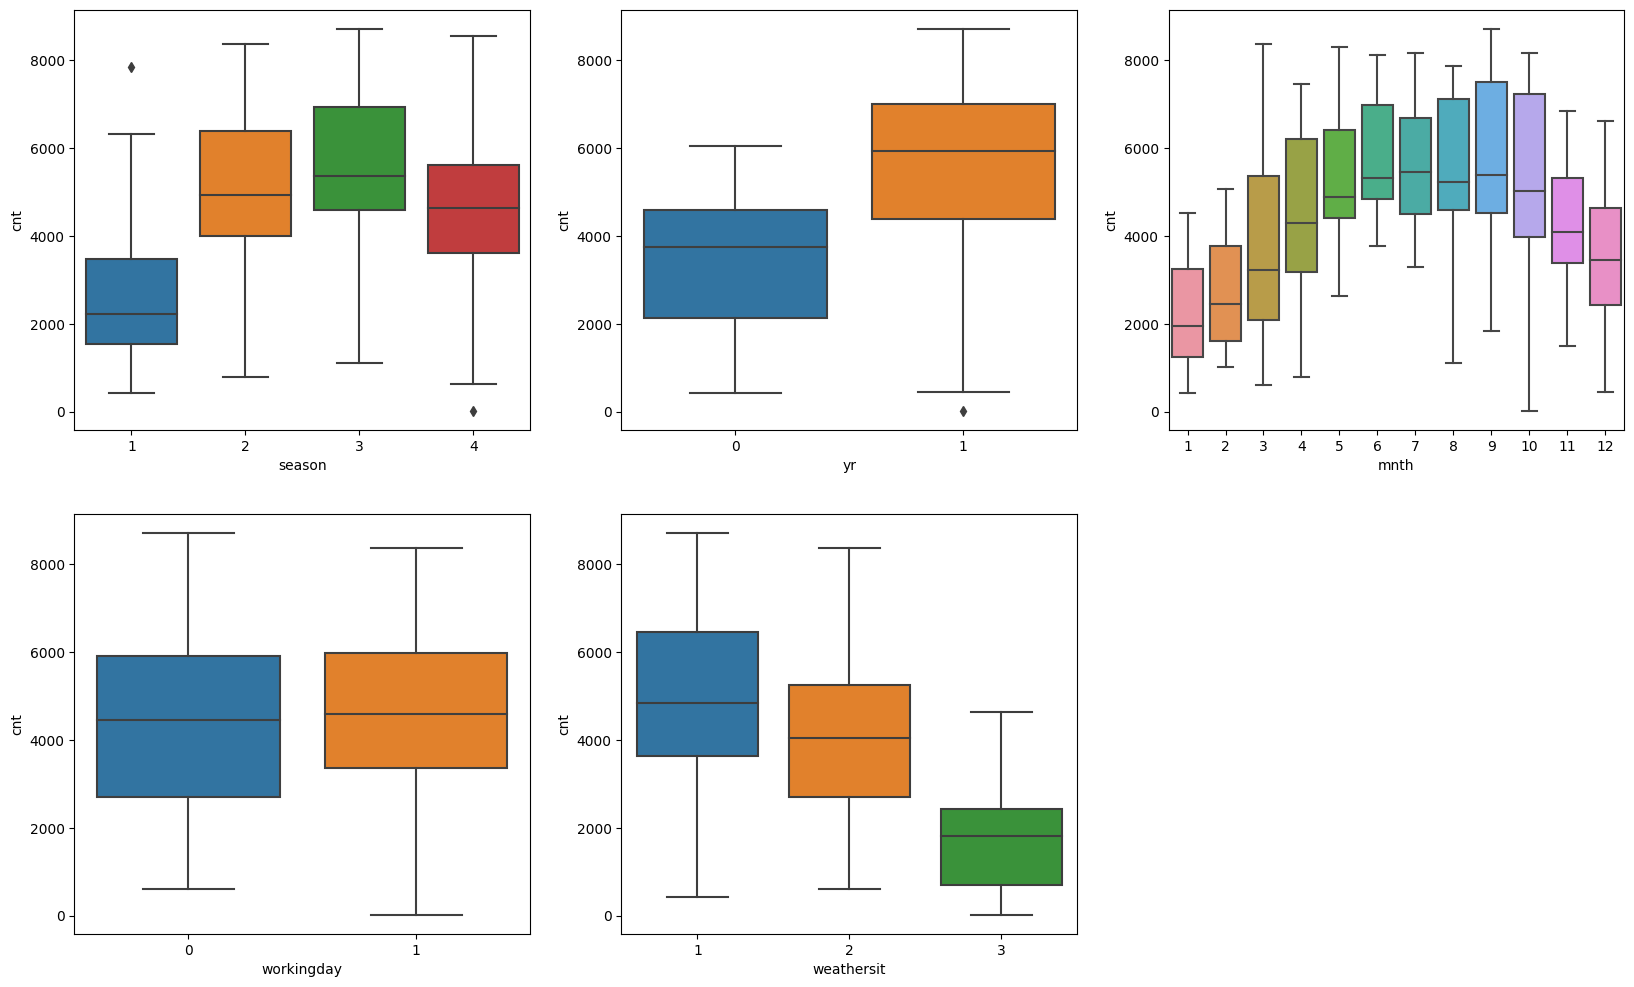

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.show()

### Data Visualization on Continous Variables

 - temp
 - atemp
 - hum
 - windspeed
 - cnt 
From the below graph, cnt vs temp and cnt vs temp looks to be linear relationship which is not the case with cnt vs hum 
and windspeed

Also from the graph looks like temp and atemp looks to related i.e chances of multi-collinearity


/Users/nithin/anaconda3/envs/LinearRegressionProject-Nithin/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


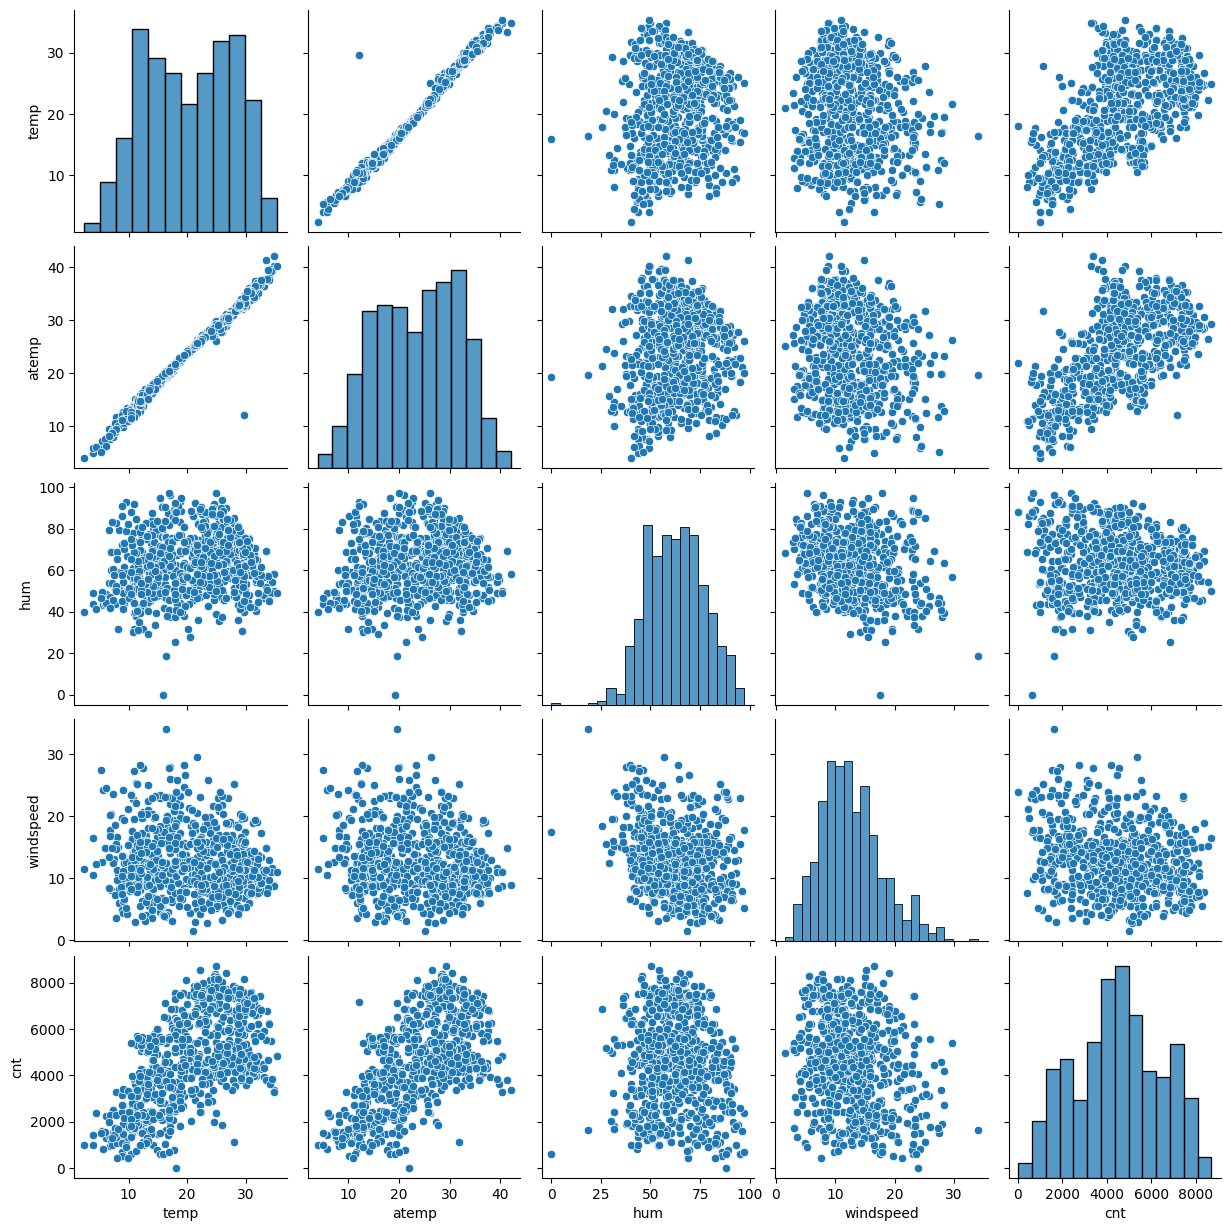

In [11]:
columns=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(data[columns])
plt.show()

### Data Preparation

### One Hot Encoding for Categorical Independent Variables

Apply one hot encoding technique (i.e Create Dummy Variables) to the following categorical variables 

 - season. Convert numerical values to relavent values and apply one hot encoding
 - month
 - weekday
 - weathersit. Convert numerical values to relavent values and apply one hot encoding

### Create Dummy Variable for Season
 - Map value in season to actual season name as given in data dictionary 1:spring, 2:summer, 3:fall, 4:winter
 - Create dummy variable for Season
 - Add the dummy variables to the original data frame
 - Drop the original season column

In [12]:
data.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [13]:
data['season']=data[['season']].apply(lambda x : x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))
season_dummy=pd.get_dummies(data['season'],drop_first=True,dtype=int)
data=pd.concat([data,season_dummy],axis=1)


In [14]:
data.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [15]:
data=data.drop("season",axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### Create Dummy Variable for Month

 - Map value in Mnth to actual month name 
 - Create dummy variable for Mnth
 - Add the dummy variables to the original data frame
 - Drop the original mnth column

In [16]:
data.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [17]:
data['mnth']=data[['mnth']].apply(lambda x : x.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",5:"May", 6:"Jun",
                                                   7: "Jul",8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov",
                                                   12: "Dec"
                                                   })
                                 )
mnth_dummy=pd.get_dummies(data['mnth'],drop_first=True,dtype=int)
data=pd.concat([data,mnth_dummy],axis=1)


In [18]:
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [19]:
data.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [20]:
data=data.drop("mnth",axis=1)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


### Create Dummy Variable for Weekday

 - Map value in weekday to actual day
 - Create dummy variable for weekday
 - Add the dummy variables to the original data frame
 - Drop the original weekday column

In [21]:
data.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [22]:
data['weekday']=data[['weekday']].apply(lambda x : x.map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday",
                                                          5:"Friday", 6:"Saturday"
                                                           })
                                         )
weekday_dummy=pd.get_dummies(data['weekday'],drop_first=True,dtype=int)
data=pd.concat([data,weekday_dummy],axis=1)


In [23]:
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,1


In [24]:
data.weekday.value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

In [25]:
data=data.drop("weekday",axis=1)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


### Create Dummy Variable for WeatherSit

 - Map value in weathersit to actual weathersit as given in data dictionary in a meaningful manner
 - Create dummy variable for weathersit
 - Add the dummy variables to the original data frame
 - Drop the original weathersit column

In [26]:
data.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [27]:
data['weathersit']=data[['weathersit']].apply(lambda x : x.map({1:"Clear", 2:"Mist", 3:"Light", 4:"Heavy"}))
weathersit_dummy=pd.get_dummies(data['weathersit'],drop_first=True,dtype=int)
data=pd.concat([data,weathersit_dummy],axis=1)


In [28]:
data.weathersit.value_counts()

weathersit
Clear    463
Mist     246
Light     21
Name: count, dtype: int64

In [29]:
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
data=data.drop("weathersit",axis=1)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Check the list of columns

In [31]:
data.dtypes

yr              int64
holiday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
spring          int64
summer          int64
winter          int64
Aug             int64
Dec             int64
Feb             int64
Jan             int64
Jul             int64
Jun             int64
Mar             int64
May             int64
Nov             int64
Oct             int64
Sep             int64
Monday          int64
Saturday        int64
Sunday          int64
Thursday        int64
Tuesday         int64
Wednesday       int64
Light           int64
Mist            int64
dtype: object

### Split the data to Train and Test with 70-30 ratio

In [32]:
data_train, data_test=train_test_split(data, train_size=0.7, random_state=99)

In [33]:
data_train.shape

(510, 30)

In [34]:
data_test.shape

(220, 30)

### Applying Min Max Scaling on numeric variables so that they all are at same scale
 - temp
 - atemp
 - hum
 - windspeed
 - cnt

In [35]:
scaler = MinMaxScaler()

In [36]:
numeric_vars=['temp','atemp','hum','windspeed','cnt']

In [37]:
data_train[numeric_vars]=scaler.fit_transform(data_train[numeric_vars])

In [38]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
373,1,0,1,0.205644,0.221060,0.721508,0.182523,0.232327,1,0,...,0,0,1,0,0,0,0,0,0,1
673,1,0,1,0.324018,0.300601,0.508141,0.510372,0.590508,0,0,...,0,0,1,0,0,0,0,0,0,0
206,0,0,1,0.887856,0.811090,0.556126,0.424328,0.507392,0,0,...,0,0,0,0,0,0,1,0,0,0
103,0,0,1,0.508849,0.503622,0.555699,0.210674,0.343024,0,1,...,0,0,0,0,0,1,0,0,0,0
329,0,0,0,0.394627,0.401689,0.700943,0.109810,0.318300,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.492157,0.027451,0.713725,0.547457,0.521916,0.642421,0.389773,0.501159,0.245098,0.241176,...,0.082353,0.078431,0.139216,0.135294,0.123529,0.156863,0.143137,0.160784,0.027451,0.315686
std,0.500429,0.163554,0.452463,0.227729,0.212705,0.143049,0.187261,0.238718,0.430568,0.428217,...,0.275172,0.269113,0.346511,0.342373,0.329367,0.364028,0.350557,0.367693,0.163554,0.465245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352054,0.341613,0.539417,0.259630,0.325972,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547268,0.530558,0.637747,0.359042,0.501615,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744560,0.698388,0.743359,0.496642,0.687352,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model

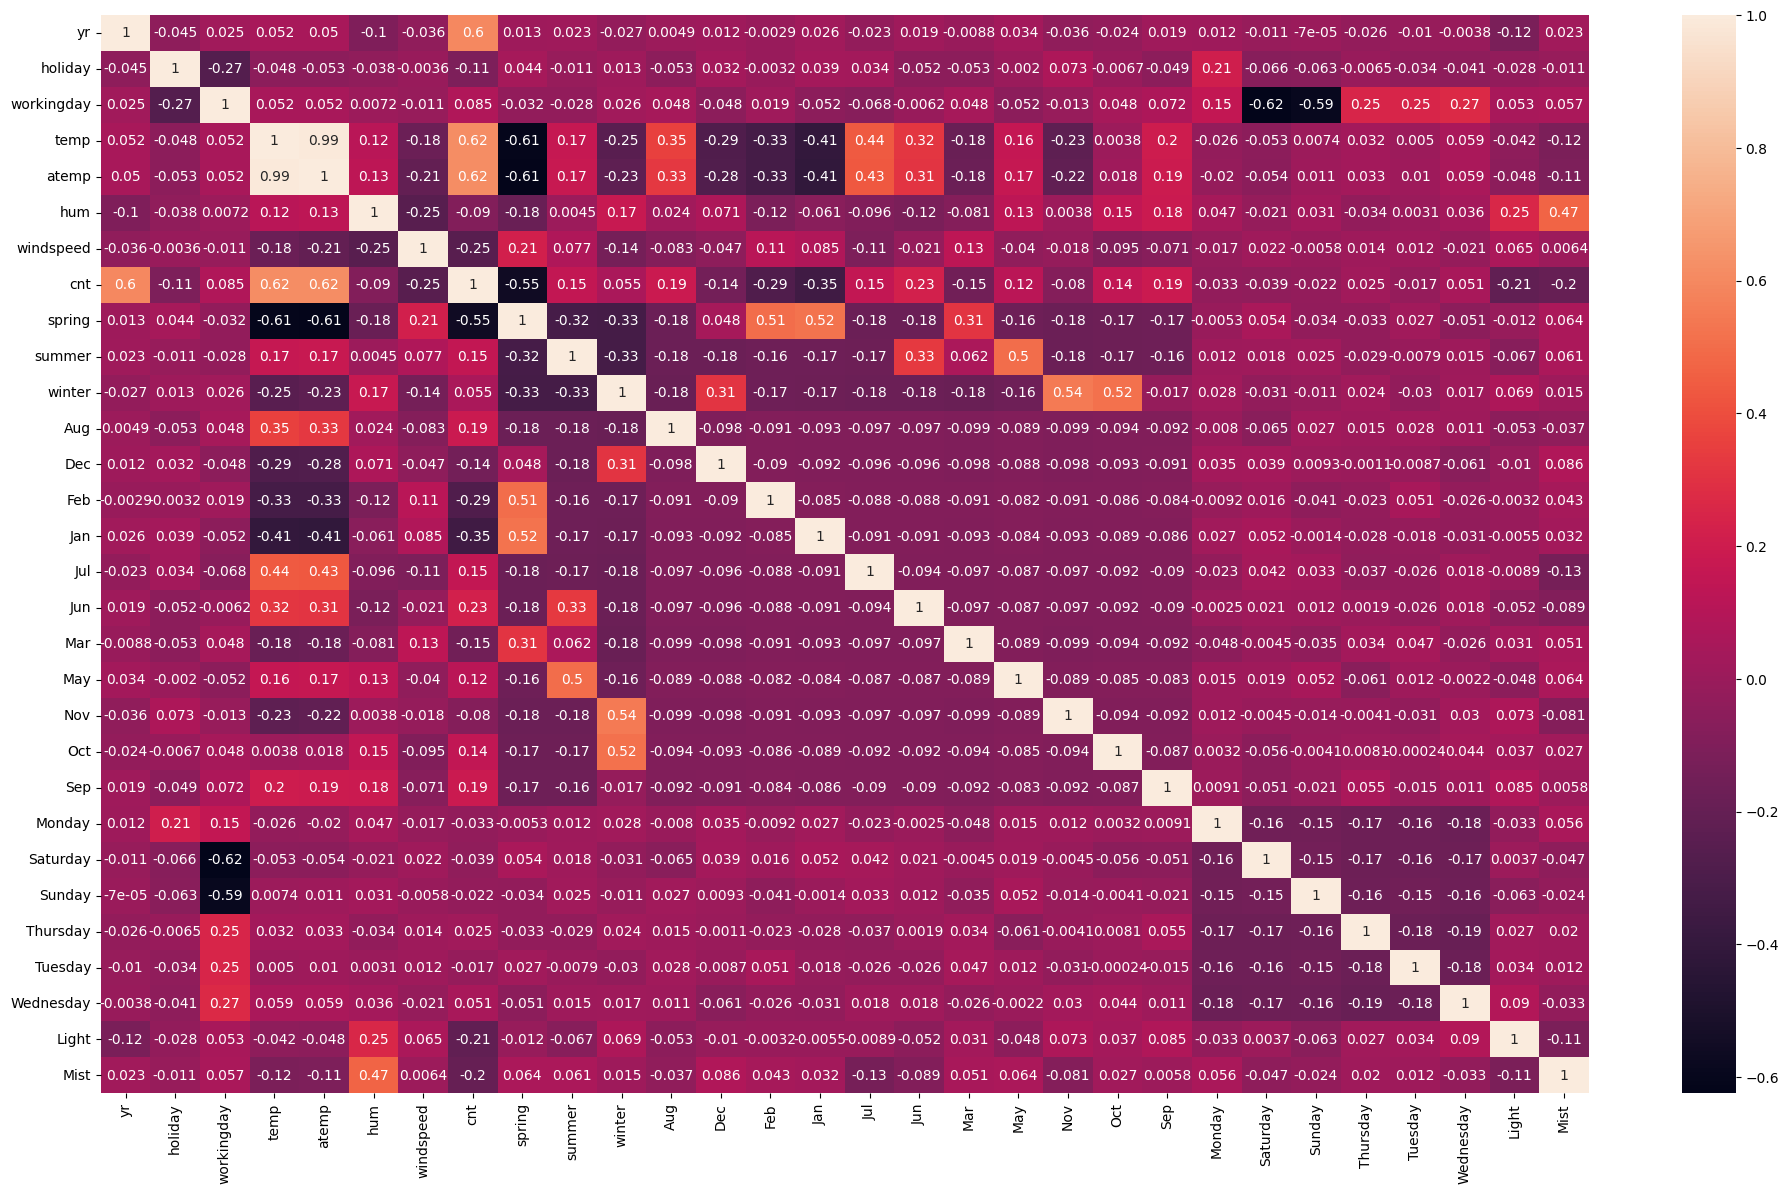

In [40]:
plt.figure(figsize=(24,14))
sns.heatmap(data_train.corr(),annot=True)
plt.show()

In [41]:
y_train=data_train.pop('cnt')
x_train=data_train
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.82e-187
Time:                        02:24:25   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -968.7
Df Residuals:                     481   BIC:                            -845.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2832      0.037      7.668      0.000       0.211       0.356
yr             0.2642      0.008     31.665      0.000       0.248       0.281
holiday        0.0332      0.023      1.424      0.155      -0.013       0.079
workingday     0.0978      0.013      7.631      0.000       0.073       0.123
temp           0.3260      0.143      2.278      0.023       0.045       0.607
atemp          0.0820      0.141      0.582      0.561      -0.195       0.359
hum           -0.1719      0.041     -4.207      0.000      -0.252      -0.092
windspeed     -0.1344      0.024     -5.495      0.000      -0.182      -0.086
spring        -0.1294      0.031     -4.168      0.000      -0.190      -0.068
summer        -0.0085      0.027     -0.319      0.750      -0.061       0.044
winter         0.0787      0.029      2.737      0.006       0.022       0.135
Aug           -0.0067      0.035     -0.189      0.850      -0.076       0.063
Dec           -0.0642      0.035     -1.834      0.067      -0.133       0.005
Feb           -0.0302      0.035     -0.869      0.385      -0.098       0.038
Jan           -0.0574      0.036     -1.612      0.108      -0.127       0.013
Jul           -0.0603      0.036     -1.653      0.099      -0.132       0.011
Jun            0.0227      0.025      0.907      0.365      -0.027       0.072
Mar            0.0097      0.027      0.360      0.719      -0.043       0.062
May            0.0229      0.023      1.014      0.311      -0.021       0.067
Nov           -0.0890      0.038     -2.360      0.019      -0.163      -0.015
Oct            0.0251      0.037      0.676      0.499      -0.048       0.098
Sep            0.0524      0.033      1.582      0.114      -0.013       0.118
Monday        -0.0210      0.016     -1.348      0.178      -0.052       0.010
Saturday       0.0923      0.014      6.364      0.000       0.064       0.121
Sunday         0.0599      0.015      4.031      0.000       0.031       0.089
Thursday      -0.0049      0.015     -0.330      0.742      -0.034       0.024
Tuesday       -0.0114      0.015     -0.749      0.454      -0.042       0.019
Wednesday     -0.0009      0.015     -0.058      0.954      -0.030       0.028
Light         -0.1881      0.028     -6.755      0.000      -0.243      -0.133
Mist          -0.0655      0.011     -5.971      0.000      -0.087      -0.044
==============================================================================
Omnibus:                       60.315   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.858
Skew:                          -0.703   Prob(JB):                     1.89e-25
Kurtosis:                       4.839   Cond. No.                     7.67e+15
==============================================================================

N

### Identify the variables to keep in the model based on below stats
 - p-value
 - VIF


In [42]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']= [ variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,94.71
3,temp,65.18
4,atemp,55.10
22,Saturday,18.16
23,Sunday,16.71
7,spring,10.97
9,winter,9.55
8,summer,8.00
18,Nov,7.18
14,Jul,6.45


### Remove variables with High p(i.e > 0.05 CI) and VIF(i.e >5) values Ex: atemp

In [43]:
x_train=data_train.drop(['atemp'],axis=1)
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.01e-188
Time:                        02:24:25   Log-Likelihood:                 513.16
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     482   BIC:                            -851.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2836      0.037      7.688      0.000       0.211       0.356
yr             0.2641      0.008     31.682      0.000       0.248       0.280
holiday        0.0322      0.023      1.386      0.166      -0.013       0.078
workingday     0.0978      0.013      7.637      0.000       0.073       0.123
temp           0.4045      0.048      8.442      0.000       0.310       0.499
hum           -0.1706      0.041     -4.185      0.000      -0.251      -0.091
windspeed     -0.1374      0.024     -5.755      0.000      -0.184      -0.090
spring        -0.1290      0.031     -4.159      0.000      -0.190      -0.068
summer        -0.0082      0.027     -0.308      0.758      -0.061       0.044
winter         0.0789      0.029      2.746      0.006       0.022       0.135
Aug           -0.0098      0.035     -0.280      0.779      -0.078       0.059
Dec           -0.0645      0.035     -1.843      0.066      -0.133       0.004
Feb           -0.0306      0.035     -0.883      0.377      -0.099       0.038
Jan           -0.0582      0.036     -1.637      0.102      -0.128       0.012
Jul           -0.0622      0.036     -1.712      0.088      -0.134       0.009
Jun            0.0210      0.025      0.844      0.399      -0.028       0.070
Mar            0.0092      0.027      0.343      0.732      -0.044       0.062
May            0.0216      0.022      0.965      0.335      -0.022       0.066
Nov           -0.0890      0.038     -2.363      0.019      -0.163      -0.015
Oct            0.0247      0.037      0.665      0.506      -0.048       0.098
Sep            0.0507      0.033      1.538      0.125      -0.014       0.116
Monday        -0.0200      0.015     -1.294      0.196      -0.050       0.010
Saturday       0.0928      0.014      6.424      0.000       0.064       0.121
Sunday         0.0608      0.015      4.116      0.000       0.032       0.090
Thursday      -0.0042      0.015     -0.285      0.776      -0.034       0.025
Tuesday       -0.0106      0.015     -0.695      0.488      -0.040       0.019
Wednesday     -0.0003      0.015     -0.018      0.986      -0.029       0.029
Light         -0.1890      0.028     -6.805      0.000      -0.244      -0.134
Mist          -0.0656      0.011     -5.988      0.000      -0.087      -0.044
==============================================================================
Omnibus:                       60.116   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.208
Skew:                          -0.702   Prob(JB):                     2.61e-25
Kurtosis:                       4.832   Cond. No.                     7.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [44]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']= [ variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,94.67
21,Saturday,18.14
22,Sunday,16.67
6,spring,10.97
8,winter,9.55
7,summer,8.00
3,temp,7.32
17,Nov,7.18
18,Oct,6.41
13,Jul,6.40


### Remove variables with High p and Low VIF and rebuild the model and observe if there is any improvement in model . Ex: Wednesday, Thursday

In [45]:
x_train=data_train.drop(['Wednesday','atemp'],axis=1)
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.84e-189
Time:                        02:24:26   Log-Likelihood:                 513.16
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     483   BIC:                            -858.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2836      0.037      7.707      0.000       0.211       0.356
yr             0.2641      0.008     31.718      0.000       0.248       0.280
holiday        0.0321      0.023      1.405      0.161      -0.013       0.077
workingday     0.0977      0.012      8.193      0.000       0.074       0.121
temp           0.4045      0.048      8.451      0.000       0.310       0.499
hum           -0.1707      0.041     -4.194      0.000      -0.251      -0.091
windspeed     -0.1374      0.024     -5.761      0.000      -0.184      -0.091
spring        -0.1290      0.031     -4.164      0.000      -0.190      -0.068
summer        -0.0082      0.027     -0.309      0.758      -0.060       0.044
winter         0.0789      0.029      2.749      0.006       0.023       0.135
Aug           -0.0098      0.035     -0.281      0.779      -0.078       0.059
Dec           -0.0645      0.035     -1.845      0.066      -0.133       0.004
Feb           -0.0306      0.035     -0.884      0.377      -0.099       0.037
Jan           -0.0582      0.036     -1.639      0.102      -0.128       0.012
Jul           -0.0622      0.036     -1.714      0.087      -0.133       0.009
Jun            0.0210      0.025      0.845      0.399      -0.028       0.070
Mar            0.0092      0.027      0.344      0.731      -0.043       0.062
May            0.0216      0.022      0.966      0.334      -0.022       0.066
Nov           -0.0890      0.038     -2.366      0.018      -0.163      -0.015
Oct            0.0247      0.037      0.666      0.506      -0.048       0.098
Sep            0.0507      0.033      1.540      0.124      -0.014       0.115
Monday        -0.0199      0.013     -1.490      0.137      -0.046       0.006
Saturday       0.0929      0.014      6.605      0.000       0.065       0.121
Sunday         0.0609      0.014      4.230      0.000       0.033       0.089
Thursday      -0.0041      0.013     -0.324      0.746      -0.029       0.021
Tuesday       -0.0104      0.013     -0.802      0.423      -0.036       0.015
Light         -0.1891      0.028     -6.834      0.000      -0.243      -0.135
Mist          -0.0656      0.011     -5.997      0.000      -0.087      -0.044
==============================================================================
Omnibus:                       60.090   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.141
Skew:                          -0.702   Prob(JB):                     2.70e-25
Kurtosis:                       4.832   Cond. No.                     7.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-29. This might indicate

In [46]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']= [ variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,92.70
21,Saturday,18.12
22,Sunday,16.66
6,spring,10.96
8,winter,9.55
7,summer,8.00
3,temp,7.32
17,Nov,7.18
18,Oct,6.41
13,Jul,6.40


In [47]:
x_train=data_train.drop(['Wednesday','atemp','Thursday'],axis=1)
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.74e-190
Time:                        02:24:26   Log-Likelihood:                 513.10
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     484   BIC:                            -864.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2824      0.037      7.719      0.000       0.211       0.354
yr             0.2642      0.008     31.791      0.000       0.248       0.281
holiday        0.0311      0.023      1.374      0.170      -0.013       0.075
workingday     0.0968      0.012      8.363      0.000       0.074       0.120
temp           0.4036      0.048      8.453      0.000       0.310       0.497
hum           -0.1699      0.041     -4.186      0.000      -0.250      -0.090
windspeed     -0.1374      0.024     -5.766      0.000      -0.184      -0.091
spring        -0.1284      0.031     -4.156      0.000      -0.189      -0.068
summer        -0.0077      0.027     -0.289      0.773      -0.060       0.044
winter         0.0789      0.029      2.755      0.006       0.023       0.135
Aug           -0.0090      0.035     -0.258      0.796      -0.077       0.059
Dec           -0.0643      0.035     -1.843      0.066      -0.133       0.004
Feb           -0.0307      0.035     -0.886      0.376      -0.099       0.037
Jan           -0.0583      0.035     -1.644      0.101      -0.128       0.011
Jul           -0.0611      0.036     -1.693      0.091      -0.132       0.010
Jun            0.0215      0.025      0.866      0.387      -0.027       0.070
Mar            0.0091      0.027      0.341      0.734      -0.043       0.062
May            0.0220      0.022      0.983      0.326      -0.022       0.066
Nov           -0.0885      0.038     -2.356      0.019      -0.162      -0.015
Oct            0.0253      0.037      0.684      0.494      -0.047       0.098
Sep            0.0513      0.033      1.560      0.119      -0.013       0.116
Monday        -0.0185      0.013     -1.464      0.144      -0.043       0.006
Saturday       0.0933      0.014      6.671      0.000       0.066       0.121
Sunday         0.0613      0.014      4.278      0.000       0.033       0.089
Tuesday       -0.0090      0.012     -0.737      0.462      -0.033       0.015
Light         -0.1893      0.028     -6.851      0.000      -0.244      -0.135
Mist          -0.0658      0.011     -6.025      0.000      -0.087      -0.044
==============================================================================
Omnibus:                       60.506   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.758
Skew:                          -0.703   Prob(JB):                     1.20e-25
Kurtosis:                       4.850   Cond. No.                     7.31e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [48]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']= [ variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,90.90
21,Saturday,18.08
22,Sunday,16.62
6,spring,10.92
8,winter,9.55
7,summer,7.96
3,temp,7.30
17,Nov,7.16
18,Oct,6.39
13,Jul,6.35


### Selection of Variables using Recursive Feature Selection(RFE)
Instead of performing these iteration by removing variables one by one, we will use RFE

In [49]:
x_train=data_train
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(x_train,y_train)

In [50]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 9),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 14),
 ('Tuesday', False, 11),
 ('Wednesday', False, 15),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [51]:
columns=x_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light', 'Mist'],
      dtype='object')

In [52]:
x_train_rfe=data_train[columns]
x_train_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.36e-198
Time:                        02:24:26   Log-Likelihood:                 505.46
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     494   BIC:                            -911.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3602      0.034     10.670      0.000       0.294       0.427
yr             0.2635      0.008     31.798      0.000       0.247       0.280
holiday       -0.0669      0.025     -2.676      0.008      -0.116      -0.018
temp           0.3597      0.129      2.792      0.005       0.107       0.613
atemp          0.0824      0.136      0.606      0.545      -0.185       0.349
hum           -0.1856      0.039     -4.736      0.000      -0.263      -0.109
windspeed     -0.1369      0.024     -5.727      0.000      -0.184      -0.090
spring        -0.1308      0.016     -8.227      0.000      -0.162      -0.100
winter         0.0972      0.014      6.754      0.000       0.069       0.126
Dec           -0.0699      0.017     -4.053      0.000      -0.104      -0.036
Jan           -0.0456      0.018     -2.494      0.013      -0.082      -0.010
Jul           -0.0717      0.017     -4.249      0.000      -0.105      -0.039
Nov           -0.1009      0.019     -5.335      0.000      -0.138      -0.064
Sep            0.0449      0.016      2.816      0.005       0.014       0.076
Light         -0.1782      0.027     -6.479      0.000      -0.232      -0.124
Mist          -0.0637      0.011     -5.855      0.000      -0.085      -0.042
==============================================================================
Omnibus:                       45.979   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.691
Skew:                          -0.596   Prob(JB):                     2.22e-17
Kurtosis:                       4.478   Cond. No.                         75.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']= [ variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,atemp,357.33
2,temp,355.63
4,hum,24.77
5,windspeed,4.87
7,winter,3.01
6,spring,2.94
14,Mist,2.15
0,yr,2.02
11,Nov,1.92
9,Jan,1.63


## Remove variable atemp as it has high p-value and high vif

In [54]:
x_train_rfe=data_train[columns].drop(['atemp'],axis=1)
x_train_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     213.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.90e-199
Time:                        02:24:27   Log-Likelihood:                 505.27
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     495   BIC:                            -917.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3617      0.034     10.751      0.000       0.296       0.428
yr             0.2634      0.008     31.816      0.000       0.247       0.280
holiday       -0.0675      0.025     -2.705      0.007      -0.117      -0.018
temp           0.4351      0.034     12.947      0.000       0.369       0.501
hum           -0.1836      0.039     -4.705      0.000      -0.260      -0.107
windspeed     -0.1394      0.024     -5.923      0.000      -0.186      -0.093
spring        -0.1308      0.016     -8.229      0.000      -0.162      -0.100
winter         0.0977      0.014      6.799      0.000       0.069       0.126
Dec           -0.0702      0.017     -4.069      0.000      -0.104      -0.036
Jan           -0.0463      0.018     -2.543      0.011      -0.082      -0.011
Jul           -0.0716      0.017     -4.245      0.000      -0.105      -0.038
Nov           -0.1010      0.019     -5.343      0.000      -0.138      -0.064
Sep            0.0445      0.016      2.793      0.005       0.013       0.076
Light         -0.1792      0.027     -6.534      0.000      -0.233      -0.125
Mist          -0.0638      0.011     -5.874      0.000      -0.085      -0.042
==============================================================================
Omnibus:                       45.874   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.607
Skew:                          -0.595   Prob(JB):                     2.32e-17
Kurtosis:                       4.480   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']= [ variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,24.08
2,temp,17.48
4,windspeed,4.75
6,winter,3.00
5,spring,2.93
13,Mist,2.14
0,yr,2.02
10,Nov,1.92
8,Jan,1.62
7,Dec,1.57


## Remove variable hum,Jul as it has high vif

In [56]:
x_train_rfe=data_train[columns].drop(['atemp','hum','Jul'],axis=1)
x_train_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.71e-194
Time:                        02:24:27   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     497   BIC:                            -894.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2777      0.026     10.524      0.000       0.226       0.330
yr             0.2706      0.008     32.017      0.000       0.254       0.287
holiday       -0.0687      0.026     -2.667      0.008      -0.119      -0.018
temp           0.3579      0.031     11.367      0.000       0.296       0.420
windspeed     -0.1036      0.023     -4.448      0.000      -0.149      -0.058
spring        -0.1357      0.016     -8.299      0.000      -0.168      -0.104
winter         0.0912      0.015      6.210      0.000       0.062       0.120
Dec           -0.0815      0.018     -4.608      0.000      -0.116      -0.047
Jan           -0.0604      0.019     -3.235      0.001      -0.097      -0.024
Nov           -0.1071      0.019     -5.501      0.000      -0.145      -0.069
Sep            0.0461      0.016      2.870      0.004       0.015       0.078
Light         -0.2308      0.026     -8.821      0.000      -0.282      -0.179
Mist          -0.0906      0.009     -9.867      0.000      -0.109      -0.073
==============================================================================
Omnibus:                       47.619   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.466
Skew:                          -0.643   Prob(JB):                     1.11e-16
Kurtosis:                       4.342   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']= [ variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,windspeed,4.62
2,temp,4.09
5,winter,2.52
4,spring,2.33
0,yr,2.00
8,Nov,1.87
7,Jan,1.54
6,Dec,1.50
11,Mist,1.47
9,Sep,1.16


In [58]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
373,1,0,1,0.205644,0.221060,0.721508,0.182523,1,0,0,...,0,0,1,0,0,0,0,0,0,1
673,1,0,1,0.324018,0.300601,0.508141,0.510372,0,0,1,...,0,0,1,0,0,0,0,0,0,0
206,0,0,1,0.887856,0.811090,0.556126,0.424328,0,0,0,...,0,0,0,0,0,0,1,0,0,0
103,0,0,1,0.508849,0.503622,0.555699,0.210674,0,1,0,...,0,0,0,0,0,1,0,0,0,0
329,0,0,0,0.394627,0.401689,0.700943,0.109810,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Residual Analyis on Train Data
The graph shows that it is centered around zero mean and is normally distributed

In [59]:
y_train_cnt=lr_model.predict(x_train_sm)

/Users/nithin/anaconda3/envs/LinearRegressionProject-Nithin/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

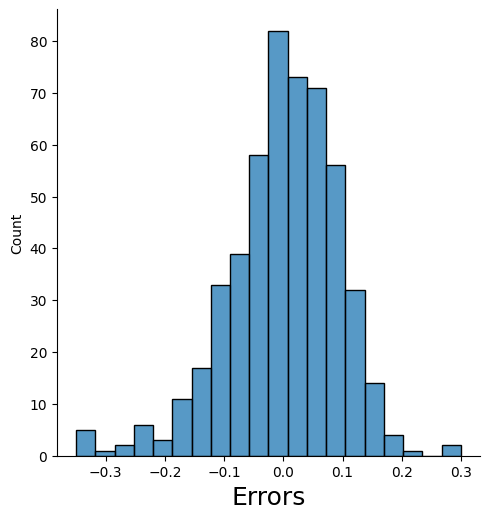

In [60]:
fig=plt.figure()
sns.displot(y_train-y_train_cnt,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)


### Prediction

In [61]:
numeric_vars=['temp','atemp','hum','windspeed','cnt']
df_test=data_test
df_test[numeric_vars]=scaler.transform(df_test[numeric_vars])

In [62]:
y_test=df_test.pop('cnt')
x_test=df_test[columns].drop(['atemp','hum','Jul'],axis=1)

In [63]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
580,1,0,0,0.914852,0.882350,0.630677,0.560788,0,0,0,...,0,0,0,1,0,0,0,0,0,0
199,0,0,1,0.894086,0.877378,0.668809,0.258148,0,0,0,...,0,0,0,0,0,0,1,0,0,0
725,1,0,1,0.243025,0.193709,0.671380,0.781879,1,0,0,...,0,0,0,0,0,1,0,0,0,1
144,0,0,1,0.749751,0.704192,0.715938,0.314528,0,1,0,...,0,0,0,0,0,0,0,1,0,0
477,1,0,1,0.327133,0.291478,0.788347,0.670619,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,0,0,0.819323,0.783754,0.776350,0.491108,0,0,0,...,0,0,0,1,0,0,0,0,0,1
393,1,0,0,0.278329,0.254194,0.320051,0.519259,1,0,0,...,0,0,0,0,1,0,0,0,0,0
638,1,0,1,0.575304,0.568280,0.667524,0.163209,0,0,1,...,1,0,1,0,0,0,0,0,0,1
338,0,0,1,0.407087,0.413290,0.850471,0.094989,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [64]:
x_test_sm=sm.add_constant(x_test)
y_test_cnt=lr_model.predict(x_test_sm)

### Model Evaluation

R-square on the test dataset is very much close  to the r-square on the trained dataset i.e 85%

In [65]:
r2_score(y_true=y_test,y_pred=y_test_cnt)

0.7754920220521809